In [92]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from matplotlib import pyplot as plt

LOADING UNEMPLOYMENT DATA

In [93]:
load_unemployment_data = Path("Desktop/Project/unemployment_data.csv")
unemployment_data = pd.read_csv(load_unemployment_data)
unemployment_data

,YEAR,Number of Unemployed
0,2014,9262000
1,2015,9090000
2,2016,7652000
3,2017,7082000
4,2018,6481000
5,2019,5941000
6,2020,17624000
7,2021,9982000


LOADING HEART DISEASE DATA

In [94]:
load_heart_data = Path("Desktop/Project/heart_data.csv")
heart_data = pd.read_csv(load_heart_data)
heart_data.head()

,YEAR,STATE,RATE,DEATHS
0,2021,AL,247.5,15173
1,2021,AK,154.7,1011
2,2021,AZ,158.3,14550
3,2021,AR,231.0,8547
4,2021,CA,147.8,65471


DROPPING COLUMNS RATE AND STATE

In [95]:
heart_data = heart_data.drop(columns=["RATE","STATE"])
heart_data.head()

,YEAR,DEATHS
0,2021,15173
1,2021,1011
2,2021,14550
3,2021,8547
4,2021,65471


GROUPING DATA BY YEAR

In [96]:
death_totals = heart_data.groupby(["YEAR"]).sum()
death_totals

,DEATHS
YEAR,
2014,613024
2015,632625
2016,633885
2017,646173
2018,654086
2019,657854
2020,695612
2021,694259


In [97]:
heart_y_axis = death_totals["DEATHS"]
heart_y_axis

YEAR
2014    613024
2015    632625
2016    633885
2017    646173
2018    654086
2019    657854
2020    695612
2021    694259
Name: DEATHS, dtype: int64

In [98]:
heart_x_axis = heart_data.groupby(["YEAR"])
heart_x_axis.groups.keys()

dict_keys([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

<function matplotlib.pyplot.show(close=None, block=None)>

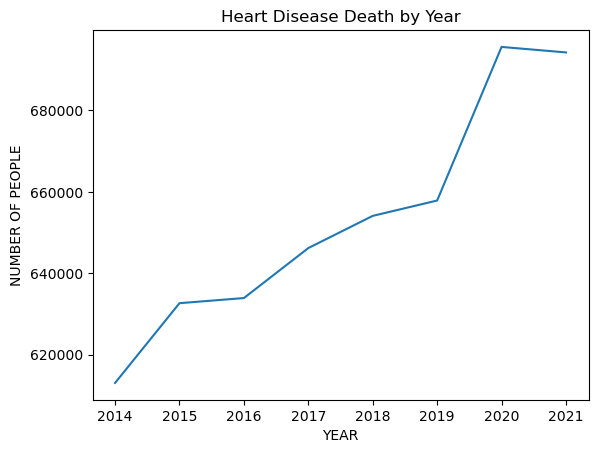

In [144]:
plt.plot(heart_x_axis.groups.keys(),heart_y_axis)
plt.title("Heart Disease Death by Year")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF PEOPLE")
plt.show

In [100]:
unemployment_x_axis = unemployment_data["YEAR"]
unemployment_x_axis

0    2014
1    2015
2    2016
3    2017
4    2018
5    2019
6    2020
7    2021
Name: YEAR, dtype: int64

In [101]:
unemployment_x_axis = unemployment_data["YEAR"]
unemployment_y_axis =unemployment_data["Number of Unemployed"]

<function matplotlib.pyplot.show(close=None, block=None)>

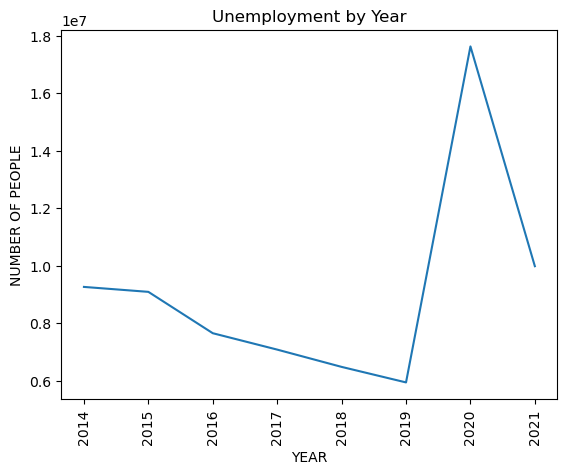

In [143]:
plt.plot(unemployment_x_axis,unemployment_y_axis)
plt.xticks(rotation=90)
plt.title("Unemployment by Year")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF PEOPLE")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

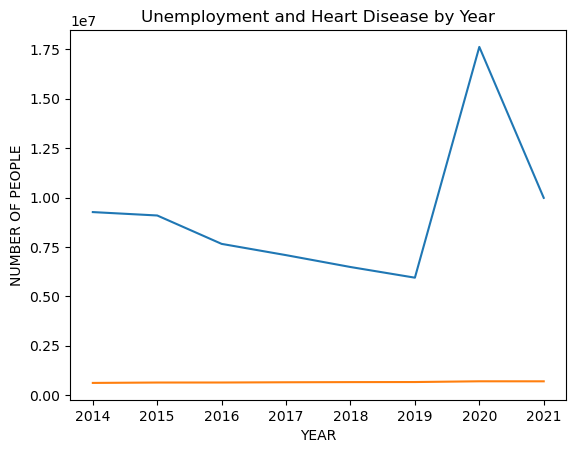

In [147]:
plt.plot(unemployment_x_axis,unemployment_y_axis)
plt.plot(heart_x_axis.groups.keys(),heart_y_axis)
plt.title("Unemployment and Heart Disease by Year")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF PEOPLE")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

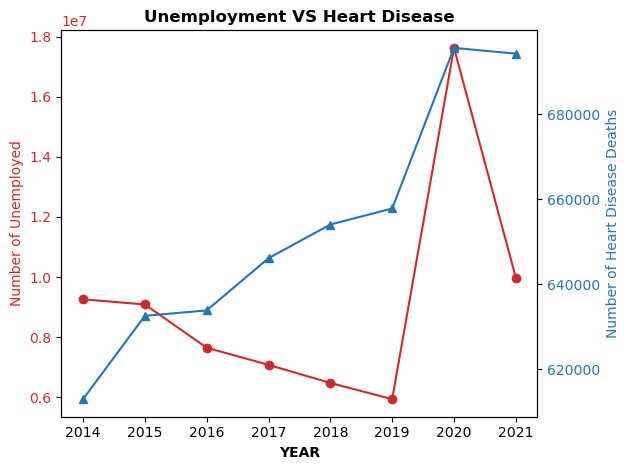

In [104]:

fig, ax1 = plt.subplots()
ax1.set_title("Unemployment VS Heart Disease" , fontweight='bold')
color = 'tab:red'
ax1.set_ylabel('Number of Unemployed', color=color)
ax1.set_xlabel('YEAR', fontweight='bold')
ax1.plot(unemployment_x_axis,unemployment_y_axis, color = color, marker = "o")
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Heart Disease Deaths', color=color)
ax2.plot(unemployment_x_axis,heart_y_axis, color = color, marker = "^")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show

In [105]:
merge_df = pd.merge(unemployment_data, death_totals, on = "YEAR")
merge_df

,YEAR,Number of Unemployed,DEATHS
0,2014,9262000,613024
1,2015,9090000,632625
2,2016,7652000,633885
3,2017,7082000,646173
4,2018,6481000,654086
5,2019,5941000,657854
6,2020,17624000,695612
7,2021,9982000,694259


In [106]:
mean_unemployment = merge_df["Number of Unemployed"].mean()
print(mean_unemployment)

9139250.0


In [107]:
mean_heart = merge_df["DEATHS"].mean()
print(mean_heart)

653439.75


In [108]:
a = merge_df["Number of Unemployed"] - mean_unemployment
a

0     122750.0
1     -49250.0
2   -1487250.0
3   -2057250.0
4   -2658250.0
5   -3198250.0
6    8484750.0
7     842750.0
Name: Number of Unemployed, dtype: float64

In [109]:
b = merge_df["DEATHS"] - mean_heart
b

0   -40415.75
1   -20814.75
2   -19554.75
3    -7266.75
4      646.25
5     4414.25
6    42172.25
7    40819.25
Name: DEATHS, dtype: float64

In [112]:
a_x_b = a * b
a_x_b

0   -4.961033e+09
1    1.025126e+09
2    2.908280e+10
3    1.494952e+10
4   -1.717894e+09
5   -1.411788e+10
6    3.578210e+11
7    3.440042e+10
dtype: float64

In [115]:
a_2 = a**2
a_2

0    1.506756e+10
1    2.425562e+09
2    2.211913e+12
3    4.232278e+12
4    7.066293e+12
5    1.022880e+13
6    7.199098e+13
7    7.102276e+11
Name: Number of Unemployed, dtype: float64

In [116]:
b_2 = b**2
b_2

0    1.633433e+09
1    4.332538e+08
2    3.823882e+08
3    5.280566e+07
4    4.176391e+05
5    1.948560e+07
6    1.778499e+09
7    1.666211e+09
Name: DEATHS, dtype: float64

In [117]:
a_x_b_sum = a_x_b.sum()
a_x_b_sum 

416482068500.0

In [118]:
a_2_sum = a_2.sum()
a_2_sum

96457989500000.0

In [119]:
b_2_sum = b_2.sum()
b_2_sum

5966493651.5

In [120]:
import math 

In [124]:
R_x_y = (a_x_b_sum)/(math.sqrt(a_2_sum*b_2_sum))
print(R_x_y)

0.5489940195809366


Correlation coefficients is 0.54 which indicates that the variables can be considered moderately correlated. 

In [130]:
scatter = merge_df.plot.scatter
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

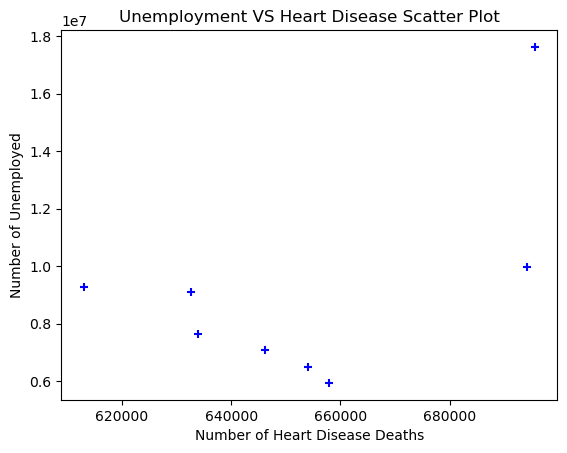

In [148]:
plt.scatter(heart_y_axis,unemployment_y_axis, marker="+", color="blue")
plt.title("Unemployment VS Heart Disease Scatter Plot")
plt.xlabel("Number of Heart Disease Deaths")
plt.ylabel("Number of Unemployed")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

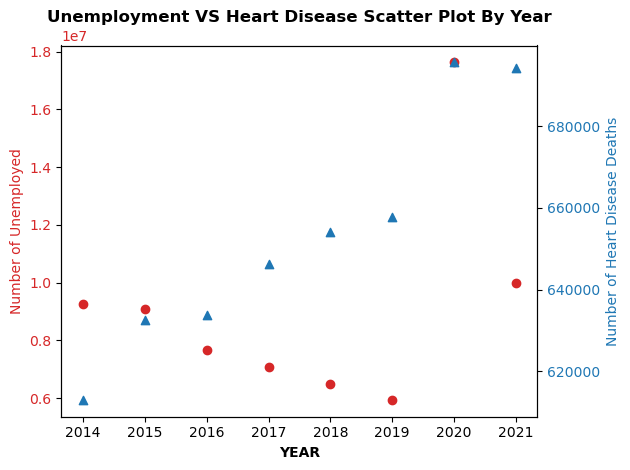

In [145]:
fig, ax1 = plt.subplots()
ax1.set_title("Unemployment VS Heart Disease Scatter Plot By Year" , fontweight='bold')
color = 'tab:red'
ax1.set_ylabel('Number of Unemployed', color=color)
ax1.set_xlabel('YEAR', fontweight='bold')
plt.scatter(unemployment_x_axis,unemployment_y_axis, color = color, marker = "o")
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Heart Disease Deaths', color=color)
plt.scatter(unemployment_x_axis,heart_y_axis, color = color, marker = "^")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show